# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
       
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#create a empty list for each column
city_name_list = []
cloud_list = []
country_list = []
dt_list = []
humidity_list = []
lat_list = []
lon_list = []
temp_max_list = []
wind_speed_list = []


#For loop to call the API for each city
for city in cities:
    #Get the weather data for each city in JSON format
    weather_data = requests.get(base_url + f'&q={city}').json()
    
    # If city found, append values to list of different columns
    if weather_data['cod'] != "404":
        #print city number(id) and City name
        print("City Number:{} and City Name:{}".format(weather_data["id"],weather_data["name"]))
        
        city_name_list.append(weather_data["name"])
        cloud_list.append(weather_data['clouds']['all'])
        country_list.append(weather_data["sys"]['country'])
        dt_list.append(weather_data["dt"])
        humidity_list.append(weather_data["main"]['humidity'])
        lat_list.append(weather_data["coord"]['lat'])
        lon_list.append(weather_data["coord"]['lon'])
        temp_max_list.append(weather_data["main"]['temp_max'])
        wind_speed_list.append(weather_data['wind']['speed'])
        
#Create a dictionary from the list for columns created above        
weather_dict = {"City":city_name_list,"Cloudiness":cloud_list,"Country":country_list,
               "Date":dt_list,"Humidity":humidity_list,"Lat":lat_list,"Lng":lon_list,
               "Max Temp": temp_max_list, "Wind Speed":wind_speed_list}

#Get the DataFrame from dictionary
weather_data_df = pd.DataFrame(weather_dict)


City Number:5861897 and City Name:Fairbanks
City Number:3406196 and City Name:Barreirinhas
City Number:5554428 and City Name:Ketchikan
City Number:3520994 and City Name:Puerto Escondido
City Number:4004293 and City Name:Ixtapa
City Number:3518679 and City Name:San Juan Evangelista
City Number:3372707 and City Name:Ribeira Grande
City Number:3430863 and City Name:Mar del Plata
City Number:6113406 and City Name:Prince Rupert
City Number:3833367 and City Name:Ushuaia
City Number:1263776 and City Name:Mangan
City Number:4132093 and City Name:Springdale
City Number:933995 and City Name:Souillac
City Number:4035715 and City Name:Avarua
City Number:3395458 and City Name:Maragogi
City Number:3985710 and City Name:Cabo San Lucas
City Number:3369157 and City Name:Cape Town
City Number:686090 and City Name:Asău
City Number:1512019 and City Name:Aksarka
City Number:175967 and City Name:Mporokoso
City Number:4030556 and City Name:Rikitea
City Number:3489657 and City Name:Lucea
City Number:935215 an

City Number:6088469 and City Name:Nipawin
City Number:2123979 and City Name:Kuril'sk
City Number:1106677 and City Name:Bambous Virieux
City Number:1568574 and City Name:Qui Nhon
City Number:2126785 and City Name:Belaya Gora
City Number:2090021 and City Name:Namatanai
City Number:1790437 and City Name:Zhuhai
City Number:2422968 and City Name:Boffa
City Number:2231881 and City Name:Eséka
City Number:653272 and City Name:Kemijärvi
City Number:6355222 and City Name:Yulara
City Number:1819729 and City Name:Hong Kong
City Number:3412093 and City Name:Vestmannaeyjar
City Number:2063036 and City Name:Port Lincoln
City Number:157429 and City Name:Kilindoni
City Number:3440777 and City Name:Rocha
City Number:5767918 and City Name:Pierre
City Number:1278201 and City Name:Atmakūr
City Number:2021188 and City Name:Kurumkan
City Number:2015179 and City Name:Tommot
City Number:5404476 and City Name:Ukiah
City Number:3832899 and City Name:Viedma
City Number:2214432 and City Name:Nālūt
City Number:1159

City Number:3869716 and City Name:Tocopilla
City Number:2514651 and City Name:Los Llanos de Aridane
City Number:1082243 and City Name:Ambilobe
City Number:2514334 and City Name:Madridejos
City Number:1496503 and City Name:Noyabrsk
City Number:370737 and City Name:Malakal
City Number:2454955 and City Name:Kolokani
City Number:1257771 and City Name:Saiha
City Number:964712 and City Name:Plettenberg Bay
City Number:6050416 and City Name:La Tuque
City Number:3361934 and City Name:Saldanha
City Number:5262680 and City Name:Merrill
City Number:2019309 and City Name:Neryungri
City Number:2701727 and City Name:Karlshamn
City Number:3894426 and City Name:Coyhaique
City Number:474354 and City Name:Verkhovazh'ye
City Number:2270380 and City Name:Câmara de Lobos
City Number:3581194 and City Name:San Ignacio
City Number:5391295 and City Name:Salinas
City Number:3141982 and City Name:Rena
City Number:3392887 and City Name:Patos
City Number:3416888 and City Name:Grindavik
City Number:893549 and City 

City Number:4845585 and City Name:Westport
City Number:2444219 and City Name:Gouré
City Number:4362001 and City Name:Mayo
City Number:6255012 and City Name:Flinders
City Number:5044290 and City Name:Saint Anthony
City Number:121801 and City Name:Urmia
City Number:3587498 and City Name:Acajutla
City Number:3460791 and City Name:Itanhaém
City Number:1255705 and City Name:Soro
City Number:1493197 and City Name:Salekhard
City Number:3372760 and City Name:Praia da Vitória
City Number:2224162 and City Name:Akom
City Number:2119626 and City Name:Yagodnoye
City Number:2264557 and City Name:Ponta do Sol
City Number:3689615 and City Name:Argelia
City Number:2270385 and City Name:Camacha
City Number:4944903 and City Name:Nantucket
City Number:1726449 and City Name:Basco


### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [16]:
#Display weather dataframe info and first 5 rows
print(weather_data_df.info())
display(weather_data_df.head())

#Export to csv
weather_data_df.to_csv("weather_data.csv",index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        588 non-null    object 
 1   Cloudiness  588 non-null    int64  
 2   Country     588 non-null    object 
 3   Date        588 non-null    int64  
 4   Humidity    588 non-null    int64  
 5   Lat         588 non-null    float64
 6   Lng         588 non-null    float64
 7   Max Temp    588 non-null    float64
 8   Wind Speed  588 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 41.5+ KB
None


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Fairbanks,1,US,1617714199,76,64.8378,-147.7164,-5.01,3.44
1,Barreirinhas,12,BR,1617714043,62,-2.7469,-42.8264,85.42,8.79
2,Ketchikan,100,US,1617714200,97,55.3422,-131.6461,38.66,3.96
3,Puerto Escondido,40,MX,1617714200,83,15.8500,-97.0667,75.20,6.91
4,Ixtapa,20,MX,1617714200,88,20.7000,-105.2000,68.00,3.38


In [111]:
import datetime as dt   
#Get todays date in mm/dd/YY format
analysis_date= dt.datetime.today().strftime("%m/%d/%y")


In [148]:
#function to set title, axis lables, widht, height and fontsize for matplotlib plots
def set_matplot(fig,ax,title,xlabel,ylabel,width,height,fontsize):
    fig.set_size_inches([width,height])
    ax.set_xlabel(xlabel,fontsize=fontsize)
    ax.set_ylabel(ylabel,fontsize=fontsize)
    ax.set_title(title,fontsize=fontsize)
    ax.grid(True)
    

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

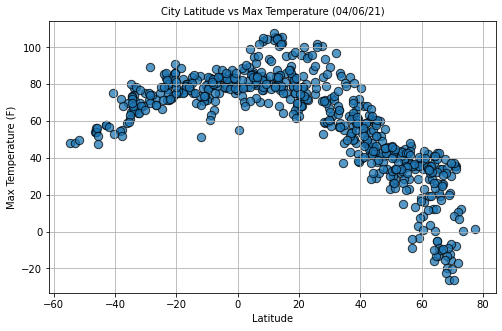

In [163]:
#Latitude vs. Temperature Plot
fig,ax = plt.subplots()
title = "City Latitude vs Max Temperature (" + analysis_date  + ")"
ax.scatter(x=weather_data_df["Lat"],y=weather_data_df["Max Temp"],s=70,edgecolor="black",linewidth=1,alpha=0.75)
#call the function to set the title, axis labels , width , height and fontsize
set_matplot(fig,ax,title,"Latitude","Max Temperature (F)",8,5,10)
fig.savefig("Lat_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

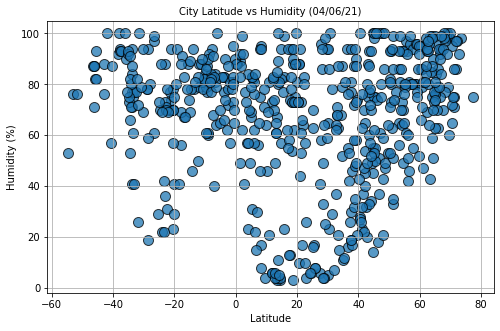

In [164]:
#Latitude vs. Humidity Plot
fig,ax = plt.subplots()

title = "City Latitude vs Humidity (" + analysis_date  + ")"
ax.scatter(x=weather_data_df["Lat"],y=weather_data_df["Humidity"],s=100,edgecolor="black",linewidth=1,alpha=0.75)
#call the function to set the title, axis labels , width , height and fontsize
set_matplot(fig,ax,title,"Latitude","Humidity (%)",8,5,10)
fig.savefig("Lat_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

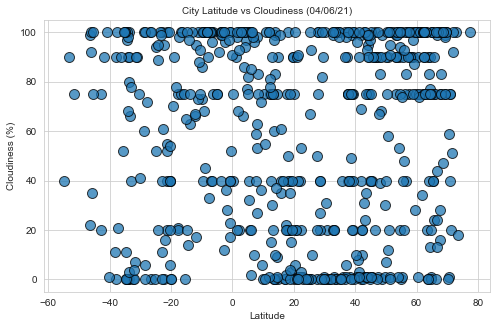

In [177]:
#Latitude vs. Clodiness Plot
fig,ax = plt.subplots()

title = "City Latitude vs Cloudiness (" + analysis_date  + ")"
ax.scatter(x=weather_data_df["Lat"],y=weather_data_df["Cloudiness"],s=100,edgecolor="black",linewidth=1,alpha=0.75)
#call the function to set the title, axis labels , width , height and fontsize
set_matplot(fig,ax,title,"Latitude","Cloudiness (%)",8,5,10)
fig.savefig("Lat_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

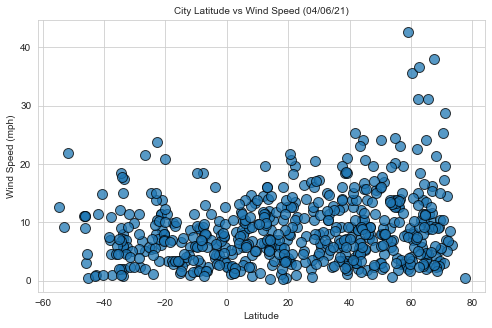

In [176]:
#Latitude vs. Wind Speed Plot
fig,ax = plt.subplots()

title = "City Latitude vs Wind Speed (" + analysis_date  + ")"
ax.scatter(x=weather_data_df["Lat"],y=weather_data_df["Wind Speed"],s=100,edgecolor="black",linewidth=1,alpha=0.75)
#call the function to set the title, axis labels , width , height and fontsize
set_matplot(fig,ax,title,"Latitude","Wind Speed (mph)",8,5,10)
fig.savefig("Lat_Wind_Speed.png")
plt.show()

In [174]:
import seaborn as sns

#function to set title, xlabel, ylabel, width and height for the seaborn plot
def set_snsplot(g,title,xlabel,ylabel,width,height):
    g.set(title=title,xlabel=xlabel,ylabel=ylabel)
    g.fig.set_figwidth(width)
    g.fig.set_figheight(height)
    

In [167]:
sns.set_style("whitegrid")

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

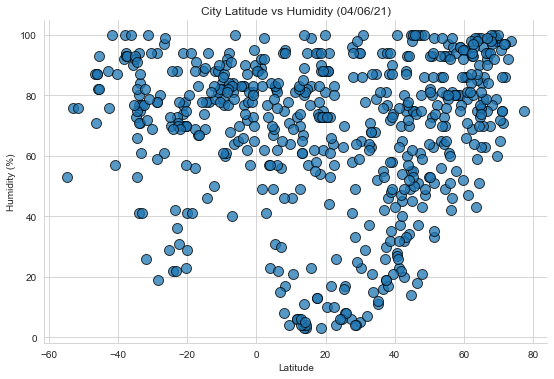

In [175]:
#Latitude vs. Humidity Plot - Using seaborn
title = "City Latitude vs Humidity (" + analysis_date  + ")"
g = sns.relplot(x="Lat",y="Humidity",kind="scatter",data=weather_data_df,s=100,edgecolor="black",linewidth=1,alpha=0.75)
#set title, labels and figure size
set_snsplot(g,title,"Latitude","Humidity (%)",8,5)


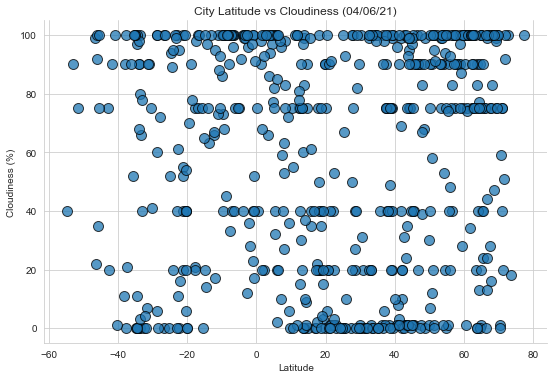

In [171]:
#Latitude vs. Cloudiness Plot - Using seaborn
title = "City Latitude vs Cloudiness (" + analysis_date  + ")"
g = sns.relplot(x="Lat",y="Cloudiness",kind="scatter",data=weather_data_df,s=100,edgecolor="black",linewidth=1,alpha=0.75)

#set title, labels and figure size
set_snsplot(g,title,"Latitude","Cloudiness (%)",8,5)

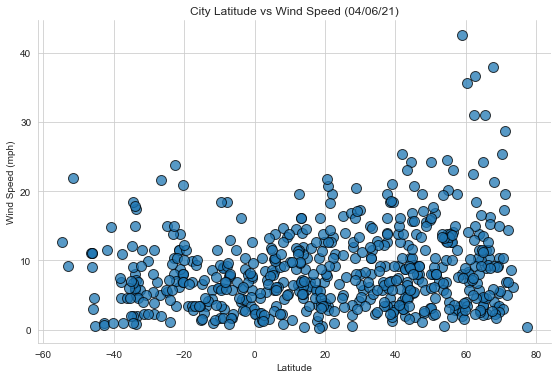

In [169]:
#Latitude vs. Wind Speed Plot - Using seaborn
title = "City Latitude vs Wind Speed (" + analysis_date  + ")"
g = sns.relplot(x="Lat",y="Wind Speed",kind="scatter",data=weather_data_df,s=100,edgecolor="black",linewidth=1,alpha=0.75)

#set title, labels and figure size
set_snsplot(g,title,"Latitude","Wind Speed (mph)",8,5)


### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

In [ ]:
#1.Latitude vs. Temperature Plot
    #- non-linear negative correlation .As the cities move towards postive latitude,temperatures are more cooler.
    # Lower latitude cities have high temp. Latititude between 60 and 80 have lowest temp. 
    # Temp. increase round the areas close to the equator.
    
#2.Latitude vs. Humidity Plot and Latitude vs. Cloudiness Plot 
    #- The data points are spread out in this plot; thus there is no correlation.
    # There is no clear relationship between latitide vs humidity and Latitude vs Cloudiness 
    
#3.Latitude vs. Wind Speed Plot
    #- Cities irrespective of latitude have wind speed in the similar range.Most cities have wind range speeds between 0 to 10mph
    # There are outliers in this plot - one city has wind(mph) above 40 and some cities have wind(mph) 30 and 40

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 